# Proyecto Final: Modelo para el resfriado común en una casa
## María del Sol Reyes Ortiz

Para poder hacer la simulación es necesario crear un código que nos genere primero la matriz de transiciones posibles $P_{(i,r)(k,l)}$.

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from math import*

In [2]:
#Cantidad de individuos en la familia y parámetro R0
N=5
R0=0.154

In [3]:
#Generamos la matriz de las posibles transiciones
Transiciones=np.zeros((N+1, N+1, N+1, N+1))

In [4]:
#Añadiremos las posibles transiciones

#Primera posible transición: infectados
for i in range(1,N):
    for j in range(N-i):
        Transiciones[i,j,i+1,j]=(R0*(N-i-j))/(R0*(N-i-j)+1)
        
#Segunda posible transición: recuperados
for i in range(1,N+1):
    for j in range(N-i+1):
        Transiciones[i,j,i-1,j+1]=1/(R0*(N-i-j)+1)
        
#Tercer posible transición: estados absorbentes
for j in range(N+1):
        Transiciones[0,j,0,j]=1

Una vez generada la matriz de transiciones posibles, haremos una nueva matriz que sea la distribución de probabilidad en los estados $q_{i,r}(n)$.

In [51]:
#Matriz de distribución de probabilidad en los estados
Q=np.zeros((N+1,N+1))
Q[1,0]=1    #Comenzamos con el estado (1,0)=1

Ahora buscaremos encontrar el tamaño final de la epidemia. Para ello haremos una función que luego iteraremos varias veces con el fin de analizar varios eventos. 

In [64]:
def evento(matrix):
    Qev=np.zeros((N+1,N+1))
    for i in range(1,N+1):
        for j in range(1,N+1):
            for k in range(1,N+1):
                for l in range(1,N+1):
                    np.array(Qev)[i,j]=np.array(Qev)[i,j]+np.array(matrix)[k,l]*np.array(Transiciones)[k,l,i,j]
    return Qev

La función de arriba nos ayudará a realizar la suma sobre todos los posibles estados $(k,l)$, como planteamos en la parte escrita. Sin embargo, esta función sólo nos da el resultado de un evento $n-1$ al siguiente evento $n$, por lo tanto si queremos realizar varios eventos seguidos debemos correrla las veces de eventos que deseemos.

In [65]:
for a in range(1,10):  #Analizaremos 9 eventos (veremos si son suficientes)
    Q=evento(Q)

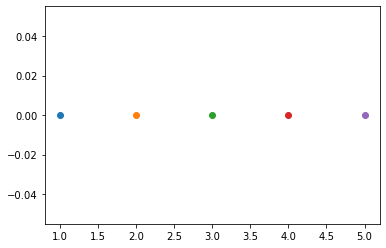

In [67]:
#Ahora graficaremos los datos resultantes
for i in range(1,N+1):
    plt.scatter(i,Q[0,i])

In [66]:
evento(Q)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])